In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#1. Load train data set
data=pd.read_csv("/content/drive/MyDrive/mnistSmall.csv")
print("Data Shape: ",data.shape)
data.head()

Data Shape:  (1734, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Columns: 785 entries, label to 28x28
dtypes: float64(278), int64(507)
memory usage: 10.4 MB


In [37]:
count = np.isinf(data).values.sum()
print("It contains " + str(count) + " infinite values")
# total count of NaN values
count=data.isnull().sum().sum()
print("It contains "+ str(count) + " NaN values")

It contains 0 infinite values
It contains 278 NaN values


In [41]:
# Using fillna() function for the whole dataframe replace NaN with 0
data = data.fillna(0)

count = np.isinf(data).values.sum()
print("It contains " + str(count) + " infinite values")
# total count of NaN values
count=data.isnull().sum().sum()
print("It contains "+ str(count) + " NaN values")

It contains 0 infinite values
It contains 0 NaN values


In [42]:
# check unique label column
np.unique(data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
# count the total number of each digit count
data['label'].value_counts()

1    201
4    194
2    194
3    179
7    176
9    170
8    166
5    154
6    150
0    150
Name: label, dtype: int64

Text(0.5, 1.0, 'Mnist Character')

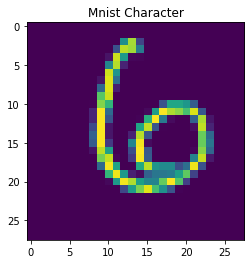

In [44]:
# Display Characters
zero = data.iloc[100, 1:]
zero = zero.values.reshape(28,28)
plt.imshow(zero)
plt.title("Mnist Character")

In [45]:
# 2. Split Dataset in Features and Traget Variables
X=data.iloc[:,1:]
Y=data.iloc[:,0]
#print("X: ",X)
#print("Y: ",Y)

In [25]:
from sklearn.preprocessing import StandardScaler
# 3. If needed , Normalize data
#X = StandardScaler().fit_transform(X)

In [46]:
# 4. Split Dataset into training and Testing sets
Train_X,Test_X, Train_Y,Test_Y =train_test_split(X,Y,test_size=0.12,random_state=1)
print("X_train: ",Train_X.shape)
print("X_test: ",Test_X.shape)
print("Y_train: ",Train_Y.shape)
print("Y_test: ",Test_Y.shape)

X_train:  (1525, 784)
X_test:  (209, 784)
Y_train:  (1525,)
Y_test:  (209,)


In [47]:
#5. Define the Classifier Model
model=SVC(kernel='linear', C=30.0,decision_function_shape="ovr")

In [48]:
#6. Train the Model
model=model.fit(Train_X,Train_Y)

In [49]:
#7. Predict the response for test dataset
ypred=model.predict(Test_X)

In [50]:
from sklearn.metrics import accuracy_score 
# 8. Print The Model Accuracy
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.8851674641148325


In [51]:
# Print the Confusion Matrix
#labels = ['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
print(confusion_matrix(Test_Y,ypred))

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  1  0  0]
 [ 0  1  0 18  0  0  0  1  1  0]
 [ 0  0  0  0 22  0  0  0  0  3]
 [ 3  0  0  0  1 11  2  0  2  0]
 [ 0  0  0  0  1  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  0  1  1  2 19  0]
 [ 0  0  0  1  0  1  0  1  0 14]]


In [52]:
# print the Classification Report
target_names = ['Digit 0','Digit 1','Digit 2','Digit 3','Digit 4','Digit 5','Digit 6','Digit 7','Digit 8','Digit 9']
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       0.86      1.00      0.93        19
     Digit 1       0.92      1.00      0.96        23
     Digit 2       1.00      0.96      0.98        23
     Digit 3       0.95      0.86      0.90        21
     Digit 4       0.92      0.88      0.90        25
     Digit 5       0.85      0.58      0.69        19
     Digit 6       0.86      0.95      0.90        20
     Digit 7       0.78      1.00      0.88        18
     Digit 8       0.86      0.79      0.83        24
     Digit 9       0.82      0.82      0.82        17

    accuracy                           0.89       209
   macro avg       0.88      0.88      0.88       209
weighted avg       0.89      0.89      0.88       209



In [53]:
model=SVC(kernel='rbf', C=3.0)
model=model.fit(Train_X,Train_Y)
ypred=model.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.9234449760765551


In [54]:
print(confusion_matrix(Test_Y,ypred))

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  1  0  0]
 [ 0  0  0 20  0  0  0  0  1  0]
 [ 0  0  0  0 24  0  0  1  0  0]
 [ 2  0  0  0  1 12  1  0  3  0]
 [ 0  0  0  0  1  0 19  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0]
 [ 0  1  0  0  0  0  1  2 19  1]
 [ 0  0  0  0  0  0  0  0  0 17]]


In [55]:
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       0.90      1.00      0.95        19
     Digit 1       0.96      1.00      0.98        23
     Digit 2       1.00      0.96      0.98        23
     Digit 3       1.00      0.95      0.98        21
     Digit 4       0.92      0.96      0.94        25
     Digit 5       1.00      0.63      0.77        19
     Digit 6       0.90      0.95      0.93        20
     Digit 7       0.82      1.00      0.90        18
     Digit 8       0.83      0.79      0.81        24
     Digit 9       0.94      1.00      0.97        17

    accuracy                           0.92       209
   macro avg       0.93      0.92      0.92       209
weighted avg       0.93      0.92      0.92       209



In [56]:
# Nearest Neighbors algorithms
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=7)
knnmodel=knnmodel.fit(Train_X,Train_Y)
ypred=knnmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.8708133971291866


In [57]:
print(confusion_matrix(Test_Y,ypred))
print(classification_report(Test_Y, ypred, target_names=target_names))

[[19  0  0  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 0  2 18  0  0  0  0  3  0  0]
 [ 0  1  0 20  0  0  0  0  0  0]
 [ 0  1  0  0 22  0  0  0  0  2]
 [ 2  1  0  0  0 13  2  0  0  1]
 [ 0  0  0  0  1  0 19  0  0  0]
 [ 0  1  0  0  0  0  0 17  0  0]
 [ 0  1  0  2  0  2  1  1 15  2]
 [ 0  0  0  0  1  0  0  0  0 16]]
              precision    recall  f1-score   support

     Digit 0       0.90      1.00      0.95        19
     Digit 1       0.77      1.00      0.87        23
     Digit 2       1.00      0.78      0.88        23
     Digit 3       0.91      0.95      0.93        21
     Digit 4       0.92      0.88      0.90        25
     Digit 5       0.87      0.68      0.76        19
     Digit 6       0.86      0.95      0.90        20
     Digit 7       0.81      0.94      0.87        18
     Digit 8       1.00      0.62      0.77        24
     Digit 9       0.76      0.94      0.84        17

    accuracy                           0.87       209
   macro avg       

In [58]:
# Random forrest Classifier
from sklearn.ensemble import RandomForestClassifier
rfmodel= RandomForestClassifier(max_depth=None, random_state=0)
rfmodel.fit(Train_X,Train_Y)
ypred=rfmodel.predict(Test_X)
print("accuracy:", accuracy_score(Test_Y,ypred))

accuracy: 0.8947368421052632


In [59]:
print(classification_report(Test_Y, ypred, target_names=target_names))

              precision    recall  f1-score   support

     Digit 0       1.00      1.00      1.00        19
     Digit 1       1.00      1.00      1.00        23
     Digit 2       0.96      0.96      0.96        23
     Digit 3       0.73      0.90      0.81        21
     Digit 4       1.00      0.96      0.98        25
     Digit 5       0.85      0.58      0.69        19
     Digit 6       0.80      1.00      0.89        20
     Digit 7       0.90      1.00      0.95        18
     Digit 8       0.89      0.67      0.76        24
     Digit 9       0.83      0.88      0.86        17

    accuracy                           0.89       209
   macro avg       0.90      0.89      0.89       209
weighted avg       0.90      0.89      0.89       209

